<h1 style="text-align:center">Real-time Sentiment Analysis and Emotion Detection of Twitter Data</h1>

This project explores sentiment analysis and emotion detection along with text preprocessing and feature engineering methods. Also, we are exploring different machine learning techniques to train classifier models and evaluate using a confusion matrix. In the second half of the project, we'll pull real-time data from Twitter, and predict sentiment and emotions to generate insights. Also, we generate a script for automated reporting, which sends reports to a given set of e-mail addresses. This project gives you an overall picture of implementing an end-to-end pipeline that provides powerful insights about any product available on the market.
This project covers the following topics.
- Building an emotion classifier model
- Label encoding
- Train-test split
- Feature engineering
- Model building
- Confusion matrix for a selected model
- Real-time data extraction
- Generating sentiment and emotions
- Visualizations and insights
- Automated report generation

<img src="flowchart.png">

## Imports

In [23]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.util import ngrams
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import sklearn.feature_extraction.text as text
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
import xgboost
from sklearn import decomposition, ensemble
import pandas, numpy, textblob, string
import re
import nltk
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

In [25]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
data = pd.read_csv("./eng_dataset.csv")
data

,ID,sentiment,content
0,10941,anger,At the point today where if someone says somet...
1,10942,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,10943,anger,This game has pissed me off more than any othe...
3,10944,anger,@spamvicious I've just found out it's Candice ...
4,10945,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...
...,...,...,...
7097,40781,sadness,@VivienLloyd Thank you so much! Just home - st...
7098,40782,sadness,Just put the winter duvet on ☃️❄️🌬☔️
7099,40783,sadness,@SilkInSide @TommyJoeRatliff that's so pretty!...
7100,40784,sadness,@BluesfestByron second artist announcement loo...


In [27]:
data["sentiment"].value_counts()

fear       2252
anger      1701
joy        1616
sadness    1533
Name: sentiment, dtype: int64

In [28]:
copy = data.copy()

In [29]:
data.head()

,ID,sentiment,content
0,10941,anger,At the point today where if someone says somet...
1,10942,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,10943,anger,This game has pissed me off more than any othe...
3,10944,anger,@spamvicious I've just found out it's Candice ...
4,10945,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...


## Preprocessing

Preprocessing and Data cleaning is important to obtain better features and accuracy. You can achieve this by doing text preprocessing steps on the data.
The preprocessing steps are as follows.
1. Lowercase
2. Remove special characters
3. Remove punctuation
4. Remove stop words
5. Correct spelling
6. Normalization

In [30]:
data[["content"]]

,content
0,At the point today where if someone says somet...
1,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,This game has pissed me off more than any othe...
3,@spamvicious I've just found out it's Candice ...
4,@moocowward @mrsajhargreaves @Melly77 @GaryBar...
...,...
7097,@VivienLloyd Thank you so much! Just home - st...
7098,Just put the winter duvet on ☃️❄️🌬☔️
7099,@SilkInSide @TommyJoeRatliff that's so pretty!...
7100,@BluesfestByron second artist announcement loo...


### lowercase

In [31]:
#convert uppercase letters to lower case
data['content'] = data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [32]:
data[["content"]].head()

,content
0,at the point today where if someone says somet...
1,@corningfootball it's game day!!!! t minus 14:...
2,this game has pissed me off more than any othe...
3,@spamvicious i've just found out it's candice ...
4,@moocowward @mrsajhargreaves @melly77 @garybar...


### removing special characters and ponctuation

In [33]:
#remove white spaces and special characters
data['content'] = data['content'].str.replace('[^\w\s]','')

C:\Users\USER\AppData\Local\Temp\ipykernel_17676\2675422991.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content'] = data['content'].str.replace('[^\w\s]','')


In [34]:
data[["content"]].head()

,content
0,at the point today where if someone says somet...
1,corningfootball its game day t minus 1430 rele...
2,this game has pissed me off more than any othe...
3,spamvicious ive just found out its candice and...
4,moocowward mrsajhargreaves melly77 garybarlow ...


### removing stopwords

In [35]:
stop = stopwords.words("english")

In [36]:
data["content"] = data["content"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [37]:
data[["content"]].head()

,content
0,point today someone says something remotely ki...
1,corningfootball game day minus 1430 relentless
2,game pissed game year blood boiling time turn ...
3,spamvicious ive found candice candace pout lik...
4,moocowward mrsajhargreaves melly77 garybarlow ...


### correct spelling


In [ ]:
# data["content"] = data["content"].apply(lambda x: str(TextBlob(x).correct()))

In [38]:
data[["content"]].head()

,content
0,point today someone says something remotely ki...
1,corningfootball game day minus 1430 relentless
2,game pissed game year blood boiling time turn ...
3,spamvicious ive found candice candace pout lik...
4,moocowward mrsajhargreaves melly77 garybarlow ...


### stemming


In [39]:
st = PorterStemmer()
data["content"] = data["content"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [40]:
data[["content"]].head()

,content
0,point today someon say someth remot kind water...
1,corningfootbal game day minu 1430 relentless
2,game piss game year blood boil time turn stlcard
3,spamvici ive found candic candac pout like ðÿ
4,moocowward mrsajhargreav melly77 garybarlow ca...


# label encoding

The target encoding is an approach to convert categorical value to numerical value. There are seven categories in this data, and we must encode them to proceed further. We are using the label encoder function to encode these categories.

In [41]:
data["sentiment"].value_counts()

fear       2252
anger      1701
joy        1616
sadness    1533
Name: sentiment, dtype: int64

In [42]:
le = preprocessing.LabelEncoder()
data["sentiment"] = le.fit_transform(data["sentiment"])

In [84]:
mapper = {i:le.classes_[i] for i in range(len(le.classes_))}
mapper

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness'}

In [43]:
data["sentiment"].value_counts()

1    2252
0    1701
2    1616
3    1533
Name: sentiment, dtype: int64

## train_test_split

The data is split into two parts: one part trains the model, which is the training set, and the other part evaluates the model, which is the test set. The train_test_split library from sklearn.model_selection is imported to split the data frame into two parts.

In [44]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data["content"], data["sentiment"], test_size=0.2, random_state=42, stratify=data["sentiment"])

## feature engineering


Feature engineering is the process of creating a new feature considering the domain context. Let's implement the count vectorizer and TF-IDF techniques to obtain the relevant features from the data sets.

In [45]:
cv = CountVectorizer()
cv.fit(data["content"])

cv_xtrain = cv.transform(X_train)
cv_xtest = cv.transform(X_test)

In [46]:
tv = TfidfVectorizer()
tv.fit(data["content"])

tv_xtrain = tv.transform(X_train)
tv_xtest = tv.transform(X_test)

## model building phase

In this phase, we are building a classifier model to predict the emotions of the tweets. We are using the following models to train the data set.
- Logistic Regression
- Naive Bayes
- Random Forest
- Support Vector Machine

In [47]:
def build(model_initializer, independant_variables_train,target ,independant_variables_test, target_test) : 
    model = model_initializer
    model.fit(independant_variables_train,target)
    prediction = model.predict(independant_variables_test)
    return metrics.accuracy_score(prediction, target_test)

### naive bayes

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [55]:
# for CV
output = build(naive_bayes.MultinomialNB(), cv_xtrain, y_train  , cv_xtest, y_test)
naive_bayes_count_acc = output
print(output)
# for TF-IDF
output = build(naive_bayes.MultinomialNB(), tv_xtrain, y_train, tv_xtest, y_test)
naive_bayes_tfidf_acc = output
print(output)

0.8451794510907812
0.7698803659394793


### Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression is estimating the parameters of a logistic model (a form of binary regression).

In [56]:
# for CV
output = build(linear_model.LogisticRegression(), cv_xtrain, y_train, cv_xtest, y_test)
linear_classifier_count_acc= output
print(output)
# for TF-IDF
output = build(linear_model.LogisticRegression(), tv_xtrain, y_train, tv_xtest , y_test)
linear_classifier_tfidf_acc = output
print(output)

0.88036593947924
0.8698099929627023


### SVM

SVM or (Suuport Vector Machine) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well


In [57]:
#for cv
output = build(svm.SVC(), cv_xtrain, y_train, cv_xtest, y_test)
svm_count_acc = output
print(output)

#for TF-IDF 
output = build(svm.SVC(), tv_xtrain, y_train, tv_xtest, y_test)
svm_tfidf_acc = output
print(output)

0.872624912033779
0.8831808585503167


### Random Forest

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [58]:
#for CV
output = build(ensemble.RandomForestClassifier(), cv_xtrain, y_train, cv_xtest, y_test)
print(output)
random_forest_count_acc = output
#for TF-IDF 
output = build(ensemble.RandomForestClassifier(), tv_xtrain, y_train, tv_xtest, y_test)
random_forest_tfidf_acc = output
print(output)

0.8775510204081632
0.8676988036593948


## Model evaluation and comparison

In [61]:
dictionary = {
    'algorithm': ['Naive Bayes', 'Naive Bayes', 'Linear Classifier', 'Linear Classifier', 'SVM', 'SVM', 'Random Forest', 'Random Forest'],
    'feature_engineering': ['Count Vector', 'TF-IDF Vector', 'Count Vector', 'TF-IDF Vector', 'Count Vector', 'TF-IDF Vector', 'Count Vector', 'TF-IDF Vector'],
    'accuracy': [naive_bayes_count_acc, naive_bayes_tfidf_acc, linear_classifier_count_acc, linear_classifier_tfidf_acc, svm_count_acc, svm_tfidf_acc, random_forest_count_acc, random_forest_tfidf_acc]
}

# Create a DataFrame
df = pd.DataFrame(dictionary)

# Display the DataFrame
df

,algorithm,feature_engineering,accuracy
0,Naive Bayes,Count Vector,0.845179
1,Naive Bayes,TF-IDF Vector,0.769880
2,Linear Classifier,Count Vector,0.880366
3,Linear Classifier,TF-IDF Vector,0.869810
4,SVM,Count Vector,0.872625
5,SVM,TF-IDF Vector,0.883181
6,Random Forest,Count Vector,0.877551
7,Random Forest,TF-IDF Vector,0.867699


## building SVM Model using TF-IDF as features
(SVM the accuracy is better compared to other models)


In [62]:
classifier = svm.SVC().fit(tv_xtrain, y_train)
val_predictions = classifier.predict(tv_xtest)

# Precision , Recall , F1 - score , Support
y_true, y_pred = y_test, val_predictions
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       340
           1       0.83      0.96      0.89       451
           2       0.97      0.90      0.93       323
           3       0.86      0.77      0.81       307

    accuracy                           0.88      1421
   macro avg       0.89      0.87      0.88      1421
weighted avg       0.89      0.88      0.88      1421



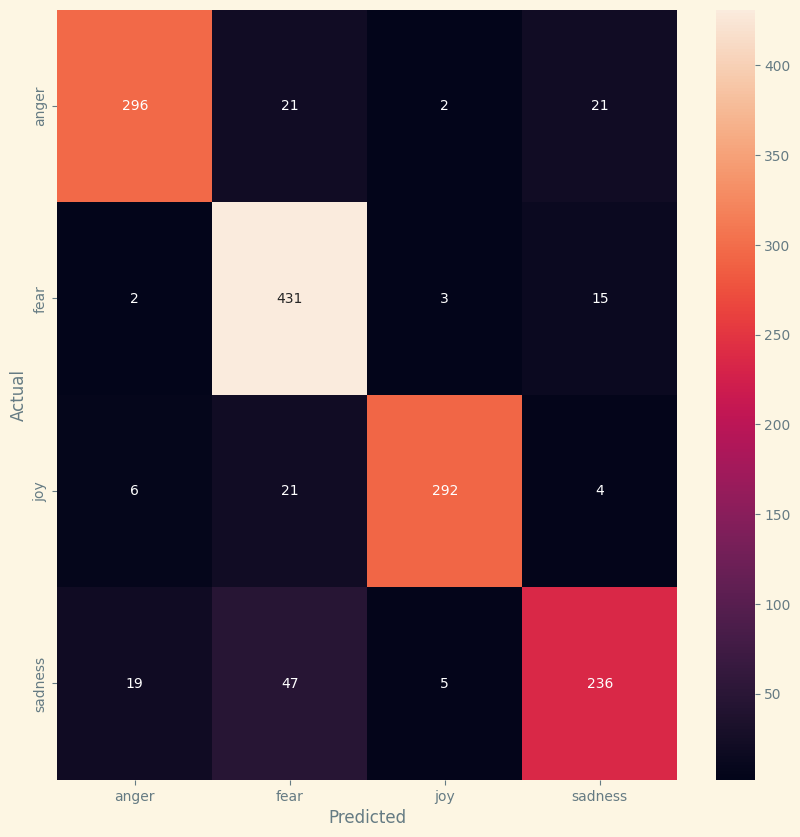

In [63]:
conf_mat = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Exporting the model and the TF-IDF vectorizer

exporting the model and the vectorizer to use them in the real-time data extraction phase, so we don't have to train the model every time we want to predict the emotions of the tweets.

In [117]:
# from joblib import dump
# # Save the model to a file
# dump(classifier, 'svm_model.joblib')

['svm_model.joblib']

In [118]:
import pickle
# Save the model to a file
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(classifier, f)

In [119]:
# Save the TF-IDF vectorizer to a file
pickle.dump(tv, open("tfidf.pkl", "wb"))

## Extracting the twitter data for the emotion predictions and sentiment

In [64]:
from twitter_search import *

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [76]:
''' search variables: '''
search_phrases = ['samsung']

time_limit = 0.1                           # runtime limit in hours
max_tweets = 100                           # number of tweets per search (will be
                                           # iterated over) - maximum is 100
min_days_old, max_days_old = 1, 2          # search limits e.g., from 7 to 8
                                           # gives current weekday from last week,
                                           # min_days_old=0 will search from right now
USA = '39.8,-95.583068847656,2500km'       # this geocode includes nearly all American
                                           # states (and a large portion of Canada)

In [77]:
# loop over search items,
# creating a new file for each
for search_phrase in search_phrases:

    print('Search phrase =', search_phrase)

    ''' other variables '''
    name = search_phrase.split()[0]
    json_file_root = name + '/'  + name
    os.makedirs(os.path.dirname(json_file_root), exist_ok=True)
    read_IDs = False
        
    # open a file in which to store the tweets
    if max_days_old - min_days_old == 1:
        d = dt.datetime.now() - dt.timedelta(days=min_days_old)
        day = '{0}-{1:0>2}-{2:0>2}'.format(d.year, d.month, d.day)
    else:
        d1 = dt.datetime.now() - dt.timedelta(days=max_days_old-1)
        d2 = dt.datetime.now() - dt.timedelta(days=min_days_old)
        day = '{0}-{1:0>2}-{2:0>2}_to_{3}-{4:0>2}-{5:0>2}'.format(
              d1.year, d1.month, d1.day, d2.year, d2.month, d2.day)
    json_file = json_file_root + '_' + day + '.json'
    if os.path.isfile(json_file):
        print('Appending tweets to file named: ',json_file)
        read_IDs = True
        
    # authorize and load the twitter API
    api = load_api()
        
    # set the 'starting point' ID for tweet collection
    if read_IDs:
        # open the json file and get the latest tweet ID
        with open(json_file, 'r') as f:
            lines = f.readlines()
            max_id = json.loads(lines[-1])['id']
            print('Searching from the bottom ID in file')
    else:
        # get the ID of a tweet that is min_days_old
        if min_days_old == 0:
            max_id = -1
        else:
            max_id = get_tweet_id(api, days_ago=(min_days_old-1))
    # set the smallest ID to search for
    since_id = get_tweet_id(api, days_ago=(max_days_old-1))
    print('max id (starting point) =', max_id)
    print('since id (ending point) =', since_id)
        


    ''' tweet gathering loop  '''
    start = dt.datetime.now()
    end = start + dt.timedelta(hours=time_limit)
    count, exitcount = 0, 0
    while dt.datetime.now() < end:
        count += 1
        print('count =',count)
        # collect tweets and update max_id
        tweets, max_id = tweet_search(api, search_phrase, max_tweets,
                                      max_id=max_id, since_id=since_id,
                                      geocode=USA)
        # write tweets to file in JSON format
        if tweets:
            write_tweets(tweets, json_file)
            exitcount = 0
        else:
            exitcount += 1
            if exitcount == 3:
                if search_phrase == search_phrases[-1]:
                    sys.exit('Maximum number of empty tweet strings reached - exiting')
                else:
                    print('Maximum number of empty tweet strings reached - breaking')
                    break

Search phrase = samsung
search limit (start/stop): 2023-05-27 23:59:59+00:00
search limit (start/stop): 2023-05-26 23:59:59+00:00
max id (starting point) = 1662609628952162304
since id (ending point) = 1662247241116012544
count = 1
found 100 tweets
count = 2
found 100 tweets
count = 3
found 100 tweets
count = 4
found 100 tweets
count = 5
found 100 tweets
count = 6
found 100 tweets
count = 7
found 100 tweets
count = 8
found 72 tweets
found 0 tweets
no tweets found
count = 9
found 0 tweets
no tweets found
count = 10
found 0 tweets
no tweets found
count = 11
found 0 tweets
no tweets found


SystemExit: Maximum number of empty tweet strings reached - exiting

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3450: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [78]:
for folder in search_phrases:
    files = os.listdir(folder)
    for file in files:
        file_name=folder+'/'+file
        print(file_name)

samsung/samsung_2023-05-27.json


In [79]:
twt = pd.DataFrame(columns=['date', 'text'])
for folder in search_phrases:
    files = os.listdir(folder)
    for file in files:
        file_name=folder+'/'+file
        twt1=pd.read_json(file_name, lines=True)
        twt1=twt1[['created_at','text']]
        twt=pd.concat([twt,twt1],ignore_index=True)


twt['text']=twt['text'].str.lstrip('0123456789')
#lower casing 
twt['text']=twt['text'].apply(lambda a: " ".join(a.lower() for a in a.split()))
#remove punctuation
twt['text']=twt['text'].str.replace('[^\w\s]','')
#remove stopwords
stop = stopwords.words('english')
twt['text']=twt['text'].apply(lambda a: " ".join(a for a in a.split() if a not in stop))
#spelling correction
# twt['text']=twt['text'].apply(lambda a: str(TextBlob(a).correct()))

twt.tail()
twt.shape

C:\Users\USER\AppData\Local\Temp\ipykernel_17676\3166382043.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  twt['text']=twt['text'].str.replace('[^\w\s]','')


(772, 3)

In [95]:
Xpredict=twt['text']
#tf-idf
predict_tfidf = tv.transform(Xpredict)
#getting predictions
twt['emotion']=classifier.predict(predict_tfidf)
twt.emotion.value_counts()

1    571
0    124
2     40
3     37
Name: emotion, dtype: int64

## Predicting the sentiment of the tweets

In [96]:
twt['sentiment']=twt['text'].apply(lambda x: TextBlob(x).sentiment[0] )
def function (value):
    if value['sentiment']>0:
        return 'positive'
    elif value['sentiment']<0:
        return 'negative'
    else:
        return 'neutral'
twt['sentiment_label']=twt.apply(lambda x: function(x),axis=1)
twt.tail()

,date,text,created_at,emotion,sentiment,sentiment_label
767,NaN,the1onlyrichie magats also cant buy jeep chevy...,2023-05-27 00:02:28+00:00,3,0.000000,neutral
768,NaN,tryn tighten animemanga skills sakura street f...,2023-05-27 00:01:14+00:00,1,0.000000,neutral
769,NaN,bragging beat hardest enemies jedi survivor je...,2023-05-27 00:00:58+00:00,1,0.000000,neutral
770,NaN,android circuit googles missing pixel amazon l...,2023-05-27 00:00:36+00:00,1,0.150000,positive
771,NaN,techage old question go apple samsung purchasi...,2023-05-27 00:00:01+00:00,1,0.118182,positive


In [106]:
import chart_studio.plotly as py
import plotly as ply
import cufflinks as cf
from plotly.offline import *
from plotly.graph_objs import *

init_notebook_mode(connected=True)
cf.set_config_file(offline=True, world_readable=True, theme='white')

sentiment_df=pd.DataFrame(twt['sentiment_label'].value_counts().reset_index())
sentiment_df.columns=['sentiment','count']

sentiment_df["percentage"]=100*sentiment_df["count"]/sentiment_df["count"].sum()
sentiment_Max=sentiment_df.iloc[0,0]
sentiment_percent=str(round(sentiment_df.iloc[0,2],2))+"%"
# plot pie chart for the sentiment_df dataframe sentiment vs count
labels = sentiment_df['sentiment']
values = sentiment_df['count']
colors = ['#FEBFB3', '#E1396C', '#96D38C']
trace = ply.graph_objs.Pie(labels=labels, values=values, textinfo='value',hoverinfo='label+percent',
                textfont=dict(size=20),
                marker=dict(colors=colors,
                            line=dict(color='#000000', width=2)))
layout = ply.graph_objs.Layout(title="Sentiment Distribution")
fig = ply.graph_objs.Figure(data=[trace], layout=layout)
fig.show()
ply.offline.plot(fig, filename='sentiment_distribution.html')

'sentiment_distribution.html'

## Emotion Analysis

In [107]:
init_notebook_mode(connected=True)
cf.set_config_file(offline=True, world_readable=True, theme='white')

emotion_df=pd.DataFrame(twt['emotion'].value_counts().reset_index())
emotion_df.columns=['emotion','count']
emotion_df=pd.DataFrame(emotion_df)
emotion_df["percentage"]=100*emotion_df["count"]/sentiment_df["count"].sum()
emotion_df["emotion"]=emotion_df['emotion'].apply(lambda x: mapper[x])
emotion_Max=emotion_df.iloc[0,0]
emotion_percent=str(round(sentiment_df.iloc[0,2],2))+"%"

fig=emotion_df.iplot(kind="pie",labels="emotion",values="count",pull=.2,hole=.2,colorscale='reds',textposition='outside',colors=['red','green','purple','orange'],title="Emotion Analysis of Tweets",world_readable=True,asFigure=True)
ply.offline.plot(fig,filename='emotion.html')

'emotion.html'

## Emotion and Sentiment Analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_17676\3928076892.py:4: FutureWarning:

`sort_columns` is deprecated and will be removed in a future version.



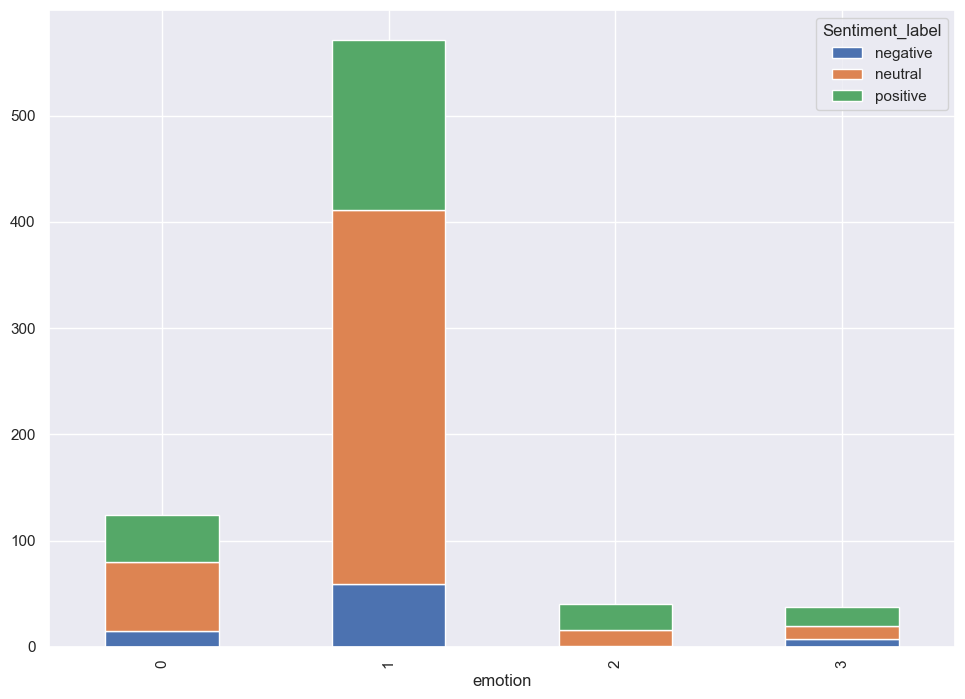

In [108]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
result = pd.crosstab(twt['emotion'], twt['sentiment_label'])
plt = result.plot.bar(stacked=True, sort_columns = True)
plt.legend(title='Sentiment_label')
plt.figure.savefig('sentiment_label.png', dpi=400)

## Automated Reporting

In [116]:
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
from email import encoders
import os
import smtplib
from credentials import Credentials
def generate_email():
    dir_path = os.getcwd()
    files = ["emotion.html", "sentiment_distribution.html", "sentiment_label.png"]
    company_dict = ['daliselmi30@gmail.com']
    password = Credentials.PASSWORD.value
    for value in company_dict:
        subject = 'Emotion Detection and Sentiment Analysis Report'
        from_address = Credentials.EMAIL.value
        to_address = value
        msg = MIMEMultipart()
        msg['Subject'] = subject
        msg['From'] = from_address
        msg['To'] = to_address
        body = "Hi \n Please find the attached report for the Emotion Detection and Sentiment Analysis \n Thanks"
        msg.attach(MIMEText(body, 'plain'))
        for f in files:
            file_location = os.path.join(dir_path, f)
            attachment = MIMEApplication(open(file_location, "rb").read(), _subtype="txt")
            attachment.add_header('Content-Disposition', "attachment", filename=f)
            msg.attach(attachment)
        stmp = smtplib.SMTP('smtp.gmail.com', 587)
        stmp.connect('smtp.gmail.com', 587)
        stmp.ehlo()
        stmp.starttls()
        stmp.ehlo()
        stmp.login(from_address, password)
        text = msg.as_string()
        stmp.sendmail(from_address, to_address, text)
        stmp.quit()
        return "Email Sent Successfully"
generate_email()

'Email Sent Successfully'

## Conclusion


Now that we completed all the phases of the project, head to `auto.py` to see how we put it all together to create and automated pipeline to pull the data from Twitter, preprocess it, and predict the emotions and sentiment of the tweets. Also, we generate a report and send it to a given set of e-mail addresses.

## References

- https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp
- Akshay Kulkarni, Adarsha Shivananda and Anoosh Kulkarni
- A. Kulkarni et al., Natural Language Processing Projects, https://doi.org/10.1007/978-1-4842-7386-9_2